In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/research/Agriculture/DATA/TEMP-FINAL/final_crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,93,57,93,22.368493,74.991838,6.410000,509.587238,tomato
1,101,51,95,22.357459,66.849420,6.400000,476.082614,tomato
2,98,47,95,23.357459,69.849420,6.140000,479.082614,tomato
3,96,35,88,23.104461,67.259138,6.270000,598.946372,tomato
4,118,59,87,22.055396,66.594238,6.140000,434.396957,tomato
...,...,...,...,...,...,...,...,...
5495,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
5496,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
5497,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
5498,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,93,57,93,22.368493,74.991838,6.41,509.587238,tomato
1,101,51,95,22.357459,66.849420,6.40,476.082614,tomato
2,98,47,95,23.357459,69.849420,6.14,479.082614,tomato
3,96,35,88,23.104461,67.259138,6.27,598.946372,tomato
4,118,59,87,22.055396,66.594238,6.14,434.396957,tomato


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
5495,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
5496,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
5497,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
5498,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
5499,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

44000

In [6]:
df.shape

(5500, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['tomato', 'Jowar(Sorghum)', 'Sunflower', 'Barley(JAV)', 'Soyabean',
       'Chickoo', 'Guava', 'Brinjal', 'Carrot', 'Ragi( naachnnii)',
       'Capsicum', 'Cabbage', 'Cauliflower', 'Cucumber', 'Drumstick',
       'Onion', 'Potato', 'Pumpkin', 'Radish', 'Sweet Potato', 'Spinach',
       'Pineapple', 'Custard apple', 'Ginger', 'Turmeric',
       'Mustard seeds', 'Green Peas', 'Chickpeas(Channa)',
       'Coriander seeds', 'Beetroot', 'Chili', 'Olive',
       'Gooseberry(Amla)', 'rice', 'maize', 'chickpea', 'kidneybeans',
       'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'pomegranate', 'banana', 'mango', 'grapes', 'watermelon',
       'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
       'jute', 'coffee'], dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

Cauliflower          100
grapes               100
mango                100
Turmeric             100
coconut              100
Soyabean             100
Onion                100
Beetroot             100
Ragi( naachnnii)     100
Chickpeas(Channa)    100
Mustard seeds        100
Chili                100
Capsicum             100
orange               100
Olive                100
jute                 100
pigeonpeas           100
coffee               100
kidneybeans          100
rice                 100
pomegranate          100
Drumstick            100
Sweet Potato         100
Ginger               100
Radish               100
chickpea             100
mungbean             100
Cucumber             100
apple                100
muskmelon            100
Green Peas           100
papaya               100
Chickoo              100
blackgram            100
Pumpkin              100
Barley(JAV)          100
Cabbage              100
watermelon           100
cotton               100
Carrot               100


<AxesSubplot:>

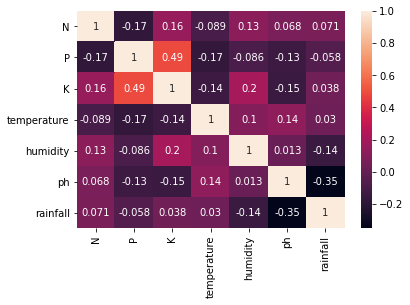

In [11]:
sns.heatmap(df.corr(),annot=True)

#### Seperating features and target label

In [12]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =108)

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=15)
DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Trees's Accuracy is: ", x*100)

Decision Trees's Accuracy is:  98.42424242424242


In [16]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Ytest,predicted_values)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(Ytest,predicted_values)))

print('Micro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(Ytest,predicted_values, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Ytest,predicted_values))

Confusion Matrix

[[32  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 30  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 25]]

Accuracy: 0.9842

Micro Precision: 0.9842
Micro Recall: 0.9842
Micro F1-score: 0.9842

Macro Precision: 0.9844
Macro Recall: 0.9847
Macro F1-score: 0.9843

Weighted Precision: 0.9846
Weighted Recall: 0.9842
Weighted F1-score: 0.9842

Classification Report

                   precision    recall  f1-score   support

      Barley(JAV)       0.97      0.97      0.97        33
         Beetroot       1.00      1.00      1.00        34
          Brinjal       1.00      1.00      1.00        34
          Cabbage       1.00      1.00      1.00        25
         Capsicum       1.00      0.94      0.97        32
           Carrot       1.00      1.00      1.00        30
      Cauliflower       1.00      1.00      1.00        33
          Chickoo       1.00      1.00      1.00        24
Chickpeas(Channa)       1.00      0.

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.99454545, 0.98545455, 0.98545455, 0.98727273, 0.98454545])

In [19]:
avg = 0
for i in score:
    avg +=i
avg=avg/5
print("average : ",avg)

average :  0.9874545454545455


### Saving trained Decision Tree model

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'C:/Users/User/Msc Codes/FINAL PROJECT/models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

### Guassian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

Naive Bayes's Accuracy is:  0.9987878787878788


In [22]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Ytest,predicted_values)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(Ytest,predicted_values)))

print('Micro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(Ytest,predicted_values, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Ytest,predicted_values))

Confusion Matrix

[[33  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 25]]

Accuracy: 0.9988

Micro Precision: 0.9988
Micro Recall: 0.9988
Micro F1-score: 0.9988

Macro Precision: 0.9990
Macro Recall: 0.9987
Macro F1-score: 0.9988

Weighted Precision: 0.9988
Weighted Recall: 0.9988
Weighted F1-score: 0.9988

Classification Report

                   precision    recall  f1-score   support

      Barley(JAV)       1.00      1.00      1.00        33
         Beetroot       1.00      1.00      1.00        34
          Brinjal       1.00      1.00      1.00        34
          Cabbage       1.00      1.00      1.00        25
         Capsicum       1.00      1.00      1.00        32
           Carrot       1.00      1.00      1.00        30
      Cauliflower       1.00      1.00      1.00        33
          Chickoo       1.00      1.00      1.00        24
Chickpeas(Channa)       1.00      1.

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99818182, 0.99818182, 0.99636364, 0.99727273, 0.99454545])

In [24]:
avg = 0
for i in score:
    avg +=i
avg=avg/5
print("average : ",avg)

average :  0.9969090909090909


### Saving trained Guassian Naive Bayes model

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'C:/Users/User/Msc Codes/FINAL PROJECT/models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

### Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

SVM = SVC(gamma='scale',max_iter=10)

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

SVM's Accuracy is:  0.8812121212121212


In [27]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Ytest,predicted_values)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(Ytest,predicted_values)))

print('Micro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(Ytest,predicted_values, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Ytest,predicted_values))

Confusion Matrix

[[31  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 25]]

Accuracy: 0.8812

Micro Precision: 0.8812
Micro Recall: 0.8812
Micro F1-score: 0.8812

Macro Precision: 0.8825
Macro Recall: 0.8832
Macro F1-score: 0.8737

Weighted Precision: 0.8854
Weighted Recall: 0.8812
Weighted F1-score: 0.8736

Classification Report

                   precision    recall  f1-score   support

      Barley(JAV)       0.84      0.94      0.89        33
         Beetroot       1.00      1.00      1.00        34
          Brinjal       0.88      0.85      0.87        34
          Cabbage       1.00      1.00      1.00        25
         Capsicum       0.42      0.25      0.31        32
           Carrot       0.67      0.97      0.79        30
      Cauliflower       1.00      0.97      0.98        33
          Chickoo       0.37      0.42      0.39        24
Chickpeas(Channa)       1.00      1.

In [28]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.87909091, 0.89363636, 0.88818182, 0.9       , 0.84272727])

In [29]:
avg = 0
for i in score:
    avg +=i
avg=avg/5
print("average : ",avg)

average :  0.8807272727272728


### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=42)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)


Logistic Regression's Accuracy is:  0.906060606060606


In [31]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Ytest,predicted_values)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(Ytest,predicted_values)))

print('Micro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(Ytest,predicted_values, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Ytest,predicted_values))

Confusion Matrix

[[30  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  1  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  5  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 25]]

Accuracy: 0.9061

Micro Precision: 0.9061
Micro Recall: 0.9061
Micro F1-score: 0.9061

Macro Precision: 0.9052
Macro Recall: 0.9045
Macro F1-score: 0.9023

Weighted Precision: 0.9069
Weighted Recall: 0.9061
Weighted F1-score: 0.9040

Classification Report

                   precision    recall  f1-score   support

      Barley(JAV)       0.91      0.91      0.91        33
         Beetroot       0.87      0.97      0.92        34
          Brinjal       0.92      0.97      0.94        34
          Cabbage       1.00      1.00      1.00        25
         Capsicum       0.75      0.56      0.64        32
           Carrot       0.79      0.87      0.83        30
      Cauliflower       1.00      1.00      1.00        33
          Chickoo       1.00      1.00      1.00        24
Chickpeas(Channa)       1.00      1.

In [32]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.90272727, 0.91181818, 0.88909091, 0.92818182, 0.91      ])

In [33]:
avg = 0
for i in score:
    avg +=i
avg=avg/5
print("average : ",avg)

average :  0.9083636363636364


### Saving trained Logistic Regression model

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'C:/Users/User/Msc Codes/FINAL PROJECT/models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10, random_state=42)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)


RF's Accuracy is:  0.9933333333333333


In [36]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Ytest,predicted_values)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(Ytest,predicted_values)))

print('Micro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(Ytest,predicted_values, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Ytest,predicted_values))

Confusion Matrix

[[33  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 25]]

Accuracy: 0.9933

Micro Precision: 0.9933
Micro Recall: 0.9933
Micro F1-score: 0.9933

Macro Precision: 0.9929
Macro Recall: 0.9939
Macro F1-score: 0.9932

Weighted Precision: 0.9938
Weighted Recall: 0.9933
Weighted F1-score: 0.9933

Classification Report

                   precision    recall  f1-score   support

      Barley(JAV)       1.00      1.00      1.00        33
         Beetroot       1.00      1.00      1.00        34
          Brinjal       1.00      1.00      1.00        34
          Cabbage       1.00      1.00      1.00        25
         Capsicum       1.00      1.00      1.00        32
           Carrot       0.97      1.00      0.98        30
      Cauliflower       1.00      1.00      1.00        33
          Chickoo       1.00      1.00      1.00        24
Chickpeas(Channa)       1.00      1.

In [37]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99454545, 0.99636364, 0.99818182, 0.99727273])

In [38]:
avg = 0
for i in score:
    avg +=i
avg=avg/5
print("average : ",avg)

average :  0.9963636363636363


### Saving trained Random Forest model

In [39]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'C:/Users/User/Msc Codes/FINAL PROJECT/models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

### XGBoost

In [40]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)



[17:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9866666666666667


In [41]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Ytest,predicted_values)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(Ytest,predicted_values)))

print('Micro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(Ytest,predicted_values, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(Ytest,predicted_values, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(Ytest,predicted_values, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(Ytest,predicted_values, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Ytest,predicted_values))

Confusion Matrix

[[31  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 25]]

Accuracy: 0.9867

Micro Precision: 0.9867
Micro Recall: 0.9867
Micro F1-score: 0.9867

Macro Precision: 0.9874
Macro Recall: 0.9862
Macro F1-score: 0.9865

Weighted Precision: 0.9872
Weighted Recall: 0.9867
Weighted F1-score: 0.9867

Classification Report

                   precision    recall  f1-score   support

      Barley(JAV)       1.00      0.94      0.97        33
         Beetroot       1.00      1.00      1.00        34
          Brinjal       1.00      0.97      0.99        34
          Cabbage       1.00      1.00      1.00        25
         Capsicum       0.97      0.97      0.97        32
           Carrot       0.97      1.00      0.98        30
      Cauliflower       1.00      1.00      1.00        33
          Chickoo       1.00      0.96      0.98        24
Chickpeas(Channa)       1.00      1.

In [42]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[17:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.99545455, 0.99      , 0.98727273, 0.99272727, 0.99      ])

In [43]:
avg = 0
for i in score:
    avg +=i
avg=avg/5
print("average : ",avg)

average :  0.991090909090909


### Saving trained XGBoost model

In [44]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'C:/Users/User/Msc Codes/FINAL PROJECT/models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

### Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

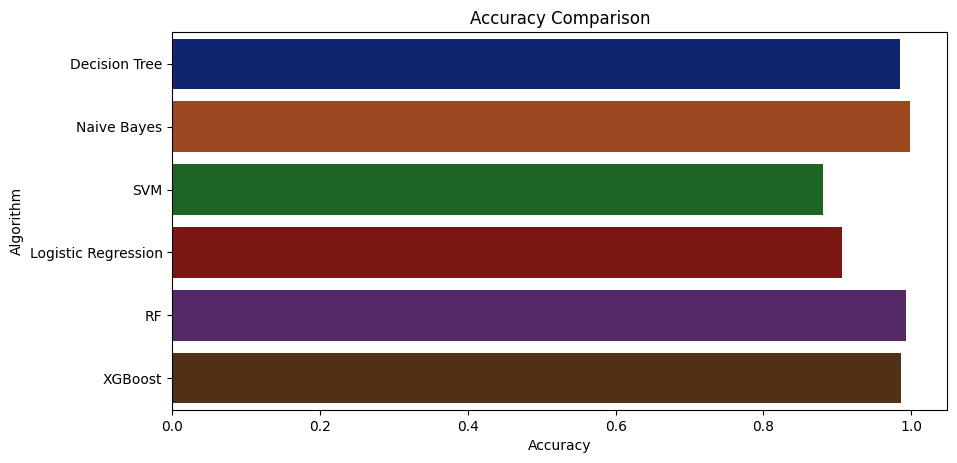

In [53]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [46]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9842424242424243
Naive Bayes --> 0.9987878787878788
SVM --> 0.8812121212121212
Logistic Regression --> 0.906060606060606
RF --> 0.9933333333333333
XGBoost --> 0.9866666666666667


### Making a prediction

In [47]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [48]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [49]:

>virtualenv crop_predict

SyntaxError: invalid syntax (<ipython-input-49-9aba245791d2>, line 1)